# Open Government Data, Canton Zurich

### **Dataset**: Bevölkerung nach Gemeinde, Heimat, Geschlecht und Alter ab 2010

### **Description**: Anzahl der Bevölkerung nach zivilrechtlichem Wohnsitz nach 1-Jahres Altersklassen. Ab 2010 inkl. vorläufig Aufgenommene, die seit mehr als einem Jahr in der Gemeinde leben, ohne WochenaufenthalterInnen und Asylsuchende. Definition "Bevölkerung nach zivilrechtlichem Wohnsitz" gemäss Finanzausgleichsverordnung (FAV), §1, Abs. 3, 4 (siehe "Gesetzliche Grundlage"). 

*Autogenerated Jupyter Notebook and basic Python code for data set* **254@statistisches-amt-kanton-zuerich**.

## Dataset profile
- **Issued** `2020-02-03T14:26:00`
- **Modified** `2022-09-19T10:48:19`
- **Startdate** `2010-01-01`
- **Enddate** `2021-12-31`
- **Theme** `['Bevölkerung']`
- **Keyword** `['alter', 'altersgruppen', 'altersklassen', 'altersstruktur', 'auslaender', 'auslaenderinnen', 'bevoelkerung', 'bezirke', 'einwohnerzahl', 'gemeinden', 'geschlecht', 'heimat', 'bevoelkerungsstatistik', 'einwohner', 'ogd', 'bevoelkerungsbestand']`
- **Publisher** `['Statistisches Amt des Kantons Zürich']`
- **Landingpage** `None`


## Import Python modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [2]:
# Distribution 0
# Ktzhdistid               : 1282
# Title                    :  Bevölkerung nach Gemeinde, Heimat, Geschlecht und Alter (1-Jahres Altersklassen)
# Description              : Alter in Einjahresaltersklassen angegeben
# Issued                   : 2020-02-03T15:16:47
# Modified                 : 2022-02-10T08:27:13
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceRequired

df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00000254_00001282.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://www.web.statistik.zh.ch/ogd/daten/ressourcen/KTZH_00000254_00001282.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [3]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [4]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 632,250 rows (observations) and 14 columns (variables).
There seem to be 0 exact duplicates in the data.


In [5]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632250 entries, 0 to 632249
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   jahr               632250 non-null  int64 
 1   gemeinde_bfs_nr    632250 non-null  int64 
 2   gemeinde           632250 non-null  object
 3   bezirk_code        632250 non-null  int64 
 4   bezirk             632250 non-null  object
 5   region_code        632250 non-null  int64 
 6   region             632250 non-null  object
 7   heimat_code        632250 non-null  int64 
 8   heimat             632250 non-null  object
 9   geschlecht_code    632250 non-null  int64 
 10  geschlecht         632250 non-null  object
 11  altersklasse_code  632250 non-null  int64 
 12  altersklasse       632250 non-null  object
 13  anzahl_personen    632250 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 290.6 MB


In [6]:
df.head()

,jahr,gemeinde_bfs_nr,gemeinde,bezirk_code,bezirk,region_code,region,heimat_code,heimat,geschlecht_code,geschlecht,altersklasse_code,altersklasse,anzahl_personen
0,2021,1,Aeugst a.A.,101,Affoltern,105,Knonaueramt,1,Schweiz,1,Mann,0,< 1 Jahr,3
1,2021,1,Aeugst a.A.,101,Affoltern,105,Knonaueramt,1,Schweiz,1,Mann,1,1 Jahr,6
2,2021,1,Aeugst a.A.,101,Affoltern,105,Knonaueramt,1,Schweiz,1,Mann,2,2 Jahre,8
3,2021,1,Aeugst a.A.,101,Affoltern,105,Knonaueramt,1,Schweiz,1,Mann,3,3 Jahre,9
4,2021,1,Aeugst a.A.,101,Affoltern,105,Knonaueramt,1,Schweiz,1,Mann,4,4 Jahre,7


In [7]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,287114,483551,447500
jahr,2016,2012,2013
gemeinde_bfs_nr,86,26,96
gemeinde,Dielsdorf,Dorf,Regensdorf
bezirk_code,104,102,104
bezirk,Dielsdorf,Andelfingen,Dielsdorf
region_code,111,110,103
region,Zürcher Unterland,Weinland,Furttal
heimat_code,2,1,1
heimat,Ausland,Schweiz,Schweiz
geschlecht_code,2,2,1


In [8]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,gemeinde,bezirk,region,heimat,geschlecht,altersklasse
count,632250,632250,632250,632250,632250,632250
unique,162,12,11,2,2,101
top,Zürich,Bülach,Zürcher Unterland,Schweiz,Frau,40 Jahre
freq,4820,88056,112531,364975,316177,7470


In [9]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(include='number'))

,jahr,gemeinde_bfs_nr,bezirk_code,region_code,heimat_code,geschlecht_code,altersklasse_code,anzahl_personen
count,"632,250.00","632,250.00","632,250.00","632,250.00","632,250.00","632,250.00","632,250.00","632,250.00"
mean,"2,015.56",129.40,105.66,107.26,1.42,1.50,44.59,27.91
std,3.45,82.69,3.22,2.98,0.49,0.50,26.41,111.58
min,"2,010.00",1.00,101.00,101.00,1.00,1.00,0.00,1.00
25%,"2,013.00",60.00,103.00,105.00,1.00,1.00,22.00,3.00
50%,"2,016.00",117.00,105.00,108.00,1.00,2.00,44.00,10.00
75%,"2,019.00",197.00,109.00,110.00,2.00,2.00,66.00,25.00
max,"2,021.00",298.00,112.00,111.00,2.00,2.00,100.00,"2,669.00"


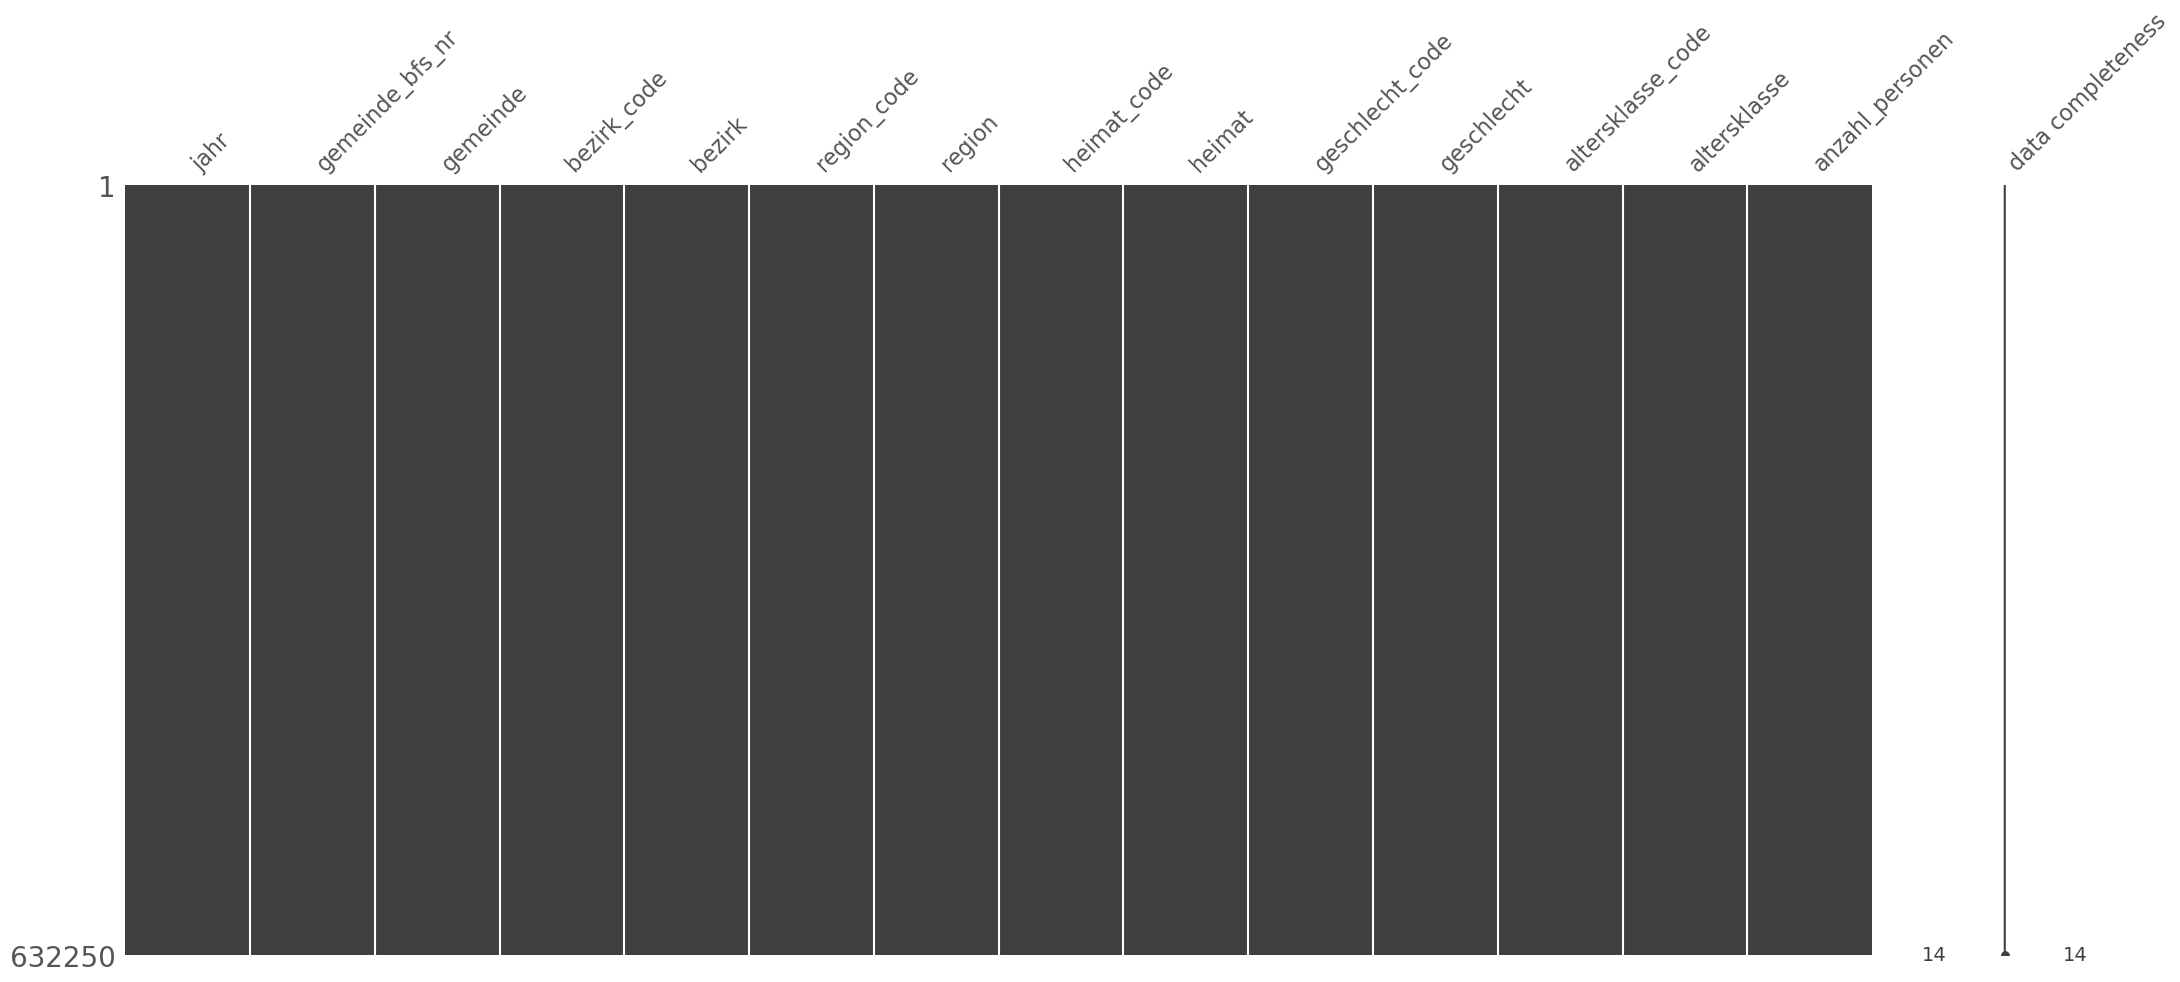

In [10]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

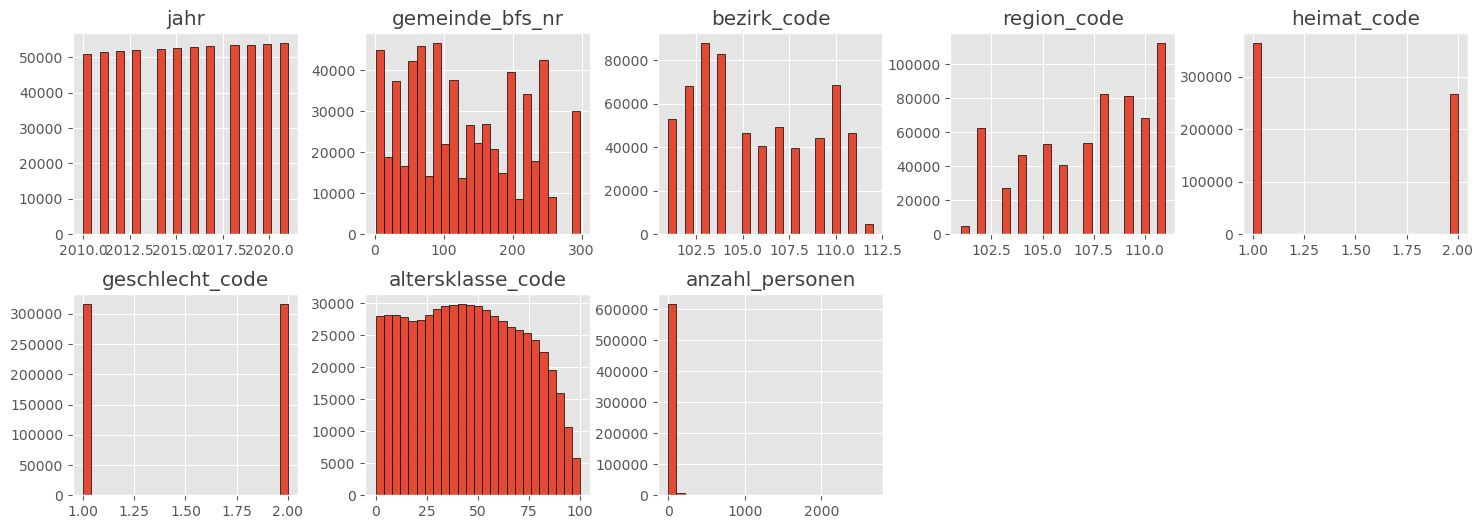

In [11]:
# plot a histogram for each numerical feature
df.hist(bins=25, layout=(-1, 5), edgecolor='black');

In [12]:
# continue your code here...

**Contact**: Statistisches Amt des Kantons Zürich | Data Shop | datashop@statistik.zh.ch